In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
%matplotlib inline

# 1. 加载数据
data1 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail3')

# 2. 数据预处理，合并数据，NA处理，分析数据
data = pd.concat([data1,data2,data3],axis=0) # 按照行进行拼接数据
#data.head(5) # 查看前五行
data.dropna(axis=1, inplace=True) # 按列删除NA列，并修改原数据
data.info() # 查看info


<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [37]:
# 统计8月份卖出菜品的平均价格
round(data['amounts'].mean(),2) # 方法一：pandas 自带函数mean
round(np.mean(data['amounts']),2) # 方法二：numpy函数处理

np.float64(44.82)

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


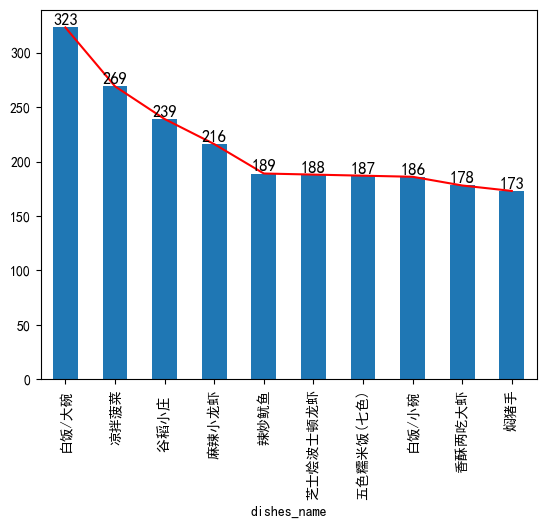

In [38]:
# 频数统计，什么菜最受欢迎，对菜名进行频数统计
dishes_count = data['dishes_name'].value_counts()[:10]
dishes_count
# 数据可视化(matplotlib)
dishes_count.plot(kind='line', color='r')
dishes_count.plot(kind='bar')
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)


Text(0, 0.5, '点菜种类')

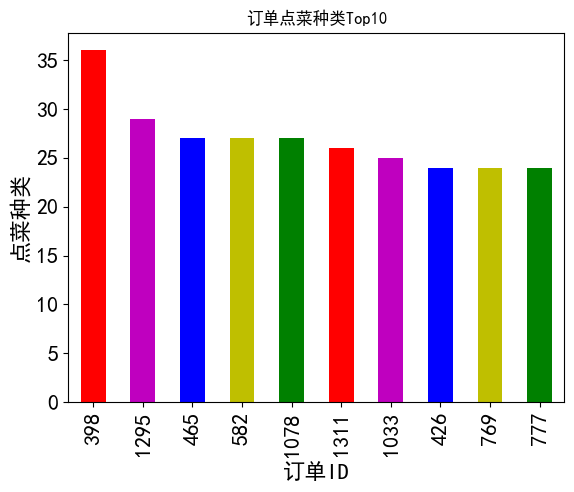

In [46]:
# 订单点菜种类最多
data_group = data['order_id'].value_counts()[:10]
data_group.plot(kind = 'bar', fontsize = 16, color = ['r','m','b','y','g'])
plt.title('订单点菜种类Top10')
plt.xlabel('订单ID',fontsize = 16)
plt.ylabel('点菜种类',fontsize = 16)
# 8月份餐厅订单点菜前十名，平均点菜25个菜品


Text(0.5, 1.0, '订单点菜数量Top10')

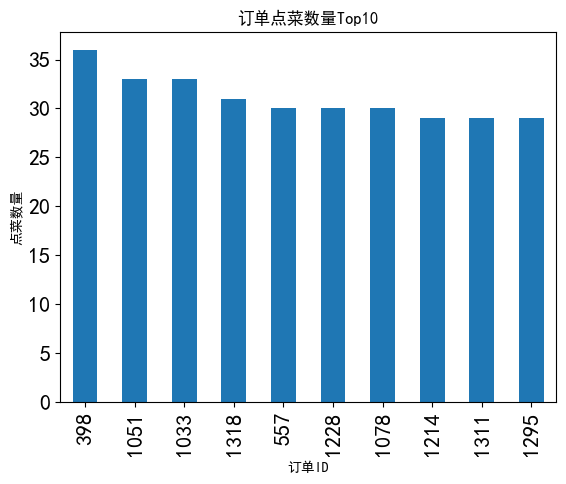

In [54]:
# 哪个订单的点菜数量Top10
data['total_amounts'] = data['counts']*data['amounts'] # 统计单道菜消费总额
dataGroup = data[['order_id', 'counts', 'amounts', 'total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum() # 分组求和
sort_counts = Group_sum.sort_values(by = 'counts', ascending = False)
sort_counts['counts'][:10].plot(kind='bar', fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单点菜数量Top10')
# 8月订单点菜数量Top10

Text(0.5, 1.0, '消费金额前10')

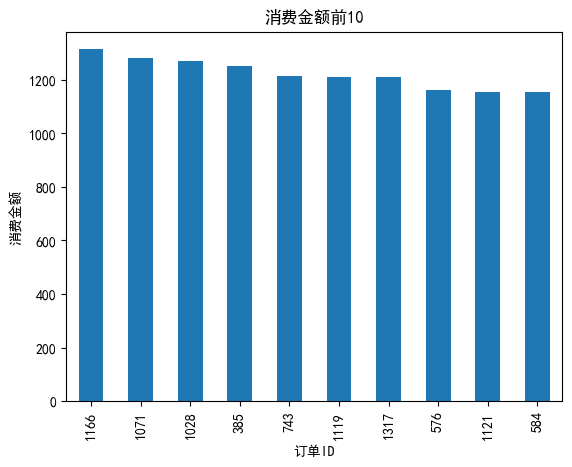

In [56]:
#哪个订单ID吃的钱最多（排序）
sort_total_amounts = Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')

Text(0.5, 1.0, '消费单价前10')

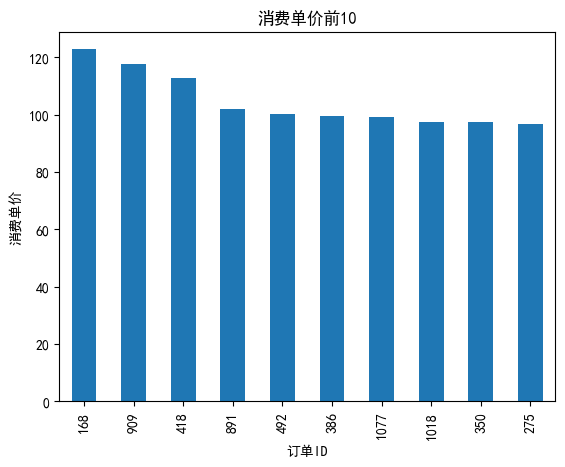

In [64]:
# 哪个订单ID平均消费最贵
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by = 'average', ascending=False)
sort_average['average'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('消费单价前10')

Text(0.5, 1.0, '下单数与小时关系图')

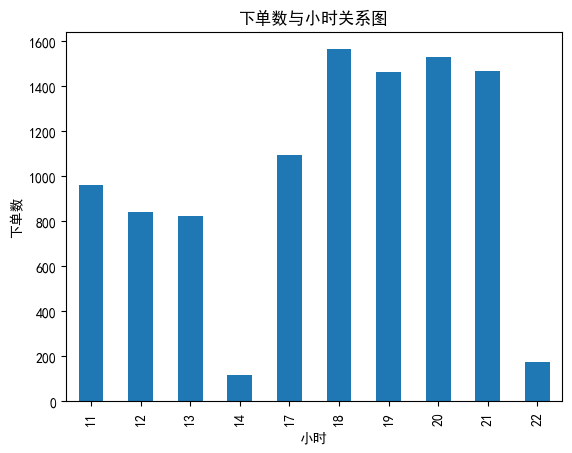

In [71]:
#一天当中什么时间段点菜量集中
data['hourcount'] = 1 # 新列，用作计数器
data['time'] = pd.to_datetime(data['place_order_time'])
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour = data.groupby(by = 'hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('下单数')
plt.title('下单数与小时关系图')

Text(0.5, 1.0, '点菜数与日期关系图')

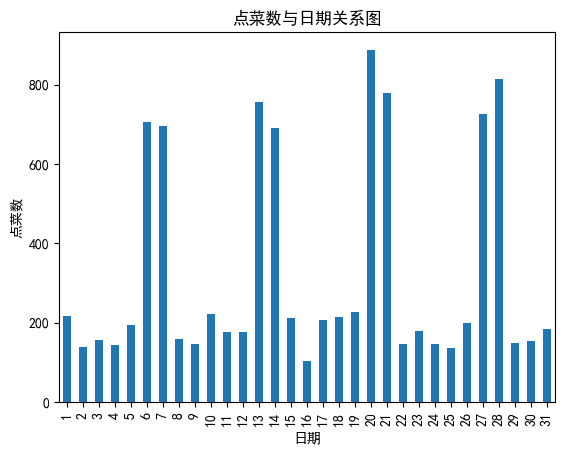

In [74]:
# 哪一天订餐数量最多
data['daycount'] = 1
data['day'] = data['time'].map(lambda x:x.day) # 析出天
gp_by_day = data.groupby(by = 'day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('日期')
plt.ylabel('点菜数')
plt.title('点菜数与日期关系图')
# 拓展：取点菜量最大的钱五天

Text(0.5, 1.0, '点菜数与星期关系图')

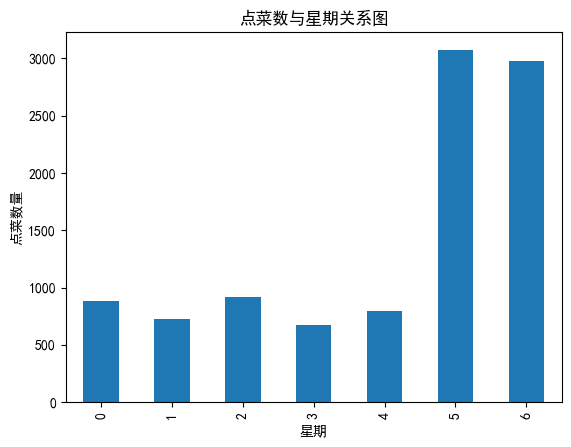

In [81]:
# 查看星期几人数最多，定餐数最多
data['weekcount']=1
data['weekday'] = data['time'].map(lambda x:x.weekday()) # 析出周
gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数与星期关系图')